# Cross Validation

In [11]:
# import scikit-learn tree and metrics 
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import pandas as pd
import numpy as np
# import matplotlib and seaborn 
# for plotting 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../input/winequality-red.csv")
# a mapping dictionary that maps the quality values from 0 to 5 
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
# you can use the map function of pandas with 
# any dictionary to convert the values in a given 
# column to values in the dictionary 
df.loc[:, "quality"] = df.quality.map(quality_mapping)

# use sample with frac=1 to shuffle the dataframe 
# we reset the indices since they change after 
# shuffling the dataframe 
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected 
# for training 
df_train = df.head(1000)
# bottom 599 values are selected 
# for testing/validation 
df_test = df.tail(599)

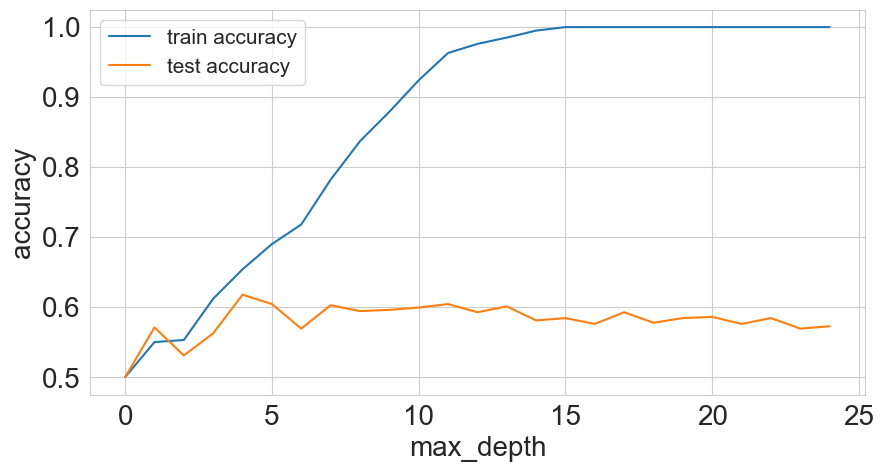

In [3]:
# this is our global size of label text 
# on the plots 
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# This line ensures that the plot is displayed 
# inside the notebook 
%matplotlib inline  
# initialize lists to store accuracies 
# for training and test data 
# we start with 50% accuracy 
train_accuracies = [0.5]
test_accuracies = [0.5]
# iterate over a few depth values 
for depth in range(1, 25):
    # init the model 
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    # columns/features for training 
    # note that, this can be done outside  
    # the loop 
    cols = [
        'fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
    ]
    # fit the model on given features 
    clf.fit(df_train[cols], df_train.quality)
    # create training & test predictions 
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    # calculate training & test accuracies 
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    # append accuracies 
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy) 

# create two plots using matplotlib 
# and seaborn 
plt.figure(figsize=(10, 5)) 
sns.set_style("whitegrid") 
plt.plot(train_accuracies, label="train accuracy") 
plt.plot(test_accuracies, label="test accuracy") 
plt.legend(loc="upper left", prop={'size': 15}) 
plt.xticks(range(0, 26, 5)) 
plt.xlabel("max_depth", size=20) 
plt.ylabel("accuracy", size=20) 
plt.show()

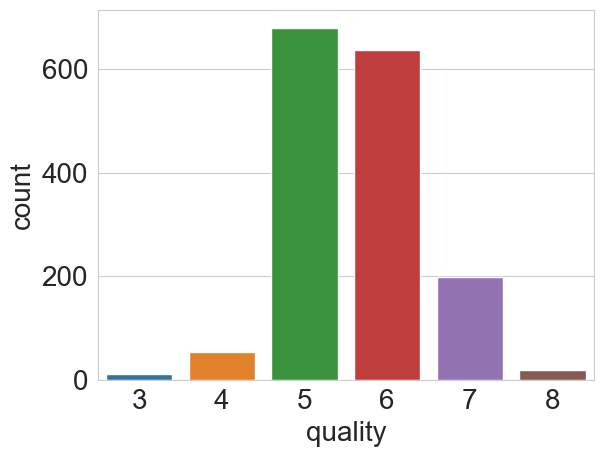

In [9]:
# Training data is in a csv file called train.csv 
df = pd.read_csv("../input/winequality-red.csv") 

# we create a new column called kfold and fill it with -1 
df["kfold"] = -1 

# the next step is to randomize the rows of the data 
df = df.sample(frac=1).reset_index(drop=True) 

# fetch targets 
y = df.quality.values 

# initiate the kfold class from model_selection module 
kf = model_selection.StratifiedKFold(n_splits=5) 

# fill the new kfold column 
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)): 
    df.loc[v_, 'kfold'] = f
b = sns.countplot(x='quality', data=df) 
b.set_xlabel("quality", fontsize=20) 
b.set_ylabel("count", fontsize=20)
plt.show()

In [15]:
from src.chapter03.kfoldsUtil import create_folds
# we create a sample dataset with 15000 samples
# and 100 features and 1 target
X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1
)

# create a dataframe out of our numpy arrays
df = pd.DataFrame(
    X,
    columns=[f"f_{i}" for i in range(X.shape[1])]
)
df.loc[:, "target"] = y

# create folds
df = create_folds(df)